In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
greed_index=pd.read_csv("/content/drive/MyDrive/ds/fear_greed_index.csv")
historical_data=pd.read_csv("/content/drive/MyDrive/ds/historical_data.csv")

In [4]:
greed_index.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
greed_index.columns = greed_index.columns.str.lower().str.replace(' ', '_')
historical_data.columns = historical_data.columns.str.lower().str.replace(' ', '_')

In [7]:
for col in historical_data.columns:
  if historical_data[col].dtype == 'object':
    historical_data[col] = historical_data[col].str.lower().str.replace(' ', '_')

for col in greed_index.columns:
  if greed_index[col].dtype == 'object':
    greed_index[col] = greed_index[col].str.lower().str.replace(' ', '_')

In [10]:
greed_index.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [11]:
historical_data.dtypes

,0
account,object
coin,object
execution_price,float64
size_tokens,float64
size_usd,float64
side,object
timestamp_ist,object
start_position,float64
direction,object
closed_pnl,float64


In [12]:
greed_index['date'] = pd.to_datetime(greed_index['date'])
historical_data['timestamp_ist'] = pd.to_datetime(historical_data['timestamp_ist'], format='%d-%m-%Y_%H:%M')

In [13]:
print(f"Classifications: {greed_index['classification'].unique()}")
print(f"Date Range: {greed_index['date'].min()} to {greed_index['date'].max()}")
print(f"Value Range: {min(greed_index['value'])} to {max(greed_index['value'])}")

Classifications: ['fear' 'extreme_fear' 'neutral' 'greed' 'extreme_greed']
Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Value Range: 5 to 95


In [14]:
print(f"Date Range: {historical_data['timestamp_ist'].min()} to {historical_data['timestamp_ist'].max()}")
print(f"Coins: {len(historical_data['coin'].unique())}")
print(f"account: {len(historical_data['account'].unique())}")

Date Range: 2023-05-01 01:06:00 to 2025-05-01 12:13:00
Coins: 246
account: 32


In [15]:
historical_data['date'] = historical_data['timestamp_ist'].dt.date
historical_data['date'] = pd.to_datetime(historical_data['date'])

In [16]:
df = pd.merge(historical_data, greed_index, on='date', how='left')

In [17]:
print(pd.isna(df).sum())

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp_x         0
date                0
timestamp_y         6
value               6
classification      6
dtype: int64


In [18]:
df[df.isnull().any(axis=1)]

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
727,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.8330,10000.00,28330.00,buy,2024-10-26 04:44:00,-32797.51,close_short,11655.000000,0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...,40671411386,False,2.719680,8.350000e+13,1.730000e+12,2024-10-26,NaN,NaN,NaN
728,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.7110,10797.51,29272.05,buy,2024-10-26 04:52:00,-22797.51,close_short,13901.794130,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671438761,False,2.810115,3.230000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
729,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.5889,6908.33,17884.98,buy,2024-10-26 04:52:00,-12000.00,close_short,9737.981968,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,1.716957,1.070000e+15,1.730000e+12,2024-10-26,NaN,NaN,NaN
730,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.5889,529.39,1370.54,buy,2024-10-26 04:52:00,-5091.67,close_short,746.228144,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.131570,8.770000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
731,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.5889,38.65,100.06,buy,2024-10-26 04:52:00,-4562.28,close_short,54.481040,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.009605,9.820000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN
732,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,eigen,2.5889,4523.63,11711.23,buy,2024-10-26 04:53:00,-4523.63,close_short,6376.508848,0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...,40671466136,False,1.124277,9.360000e+14,1.730000e+12,2024-10-26,NaN,NaN,NaN


In [19]:
df['classification']=df['classification'].fillna('no_classification')

In [20]:
grouped_df_total=historical_data.groupby(by=['account'])['closed_pnl'].sum()
grouped_df_total = grouped_df_total.reset_index()
grouped_df_total = grouped_df_total.sort_values(by='closed_pnl', ascending=True) #sorting if needed
# print(grouped_df_total.head())

In [21]:
sns.set_style("whitegrid")

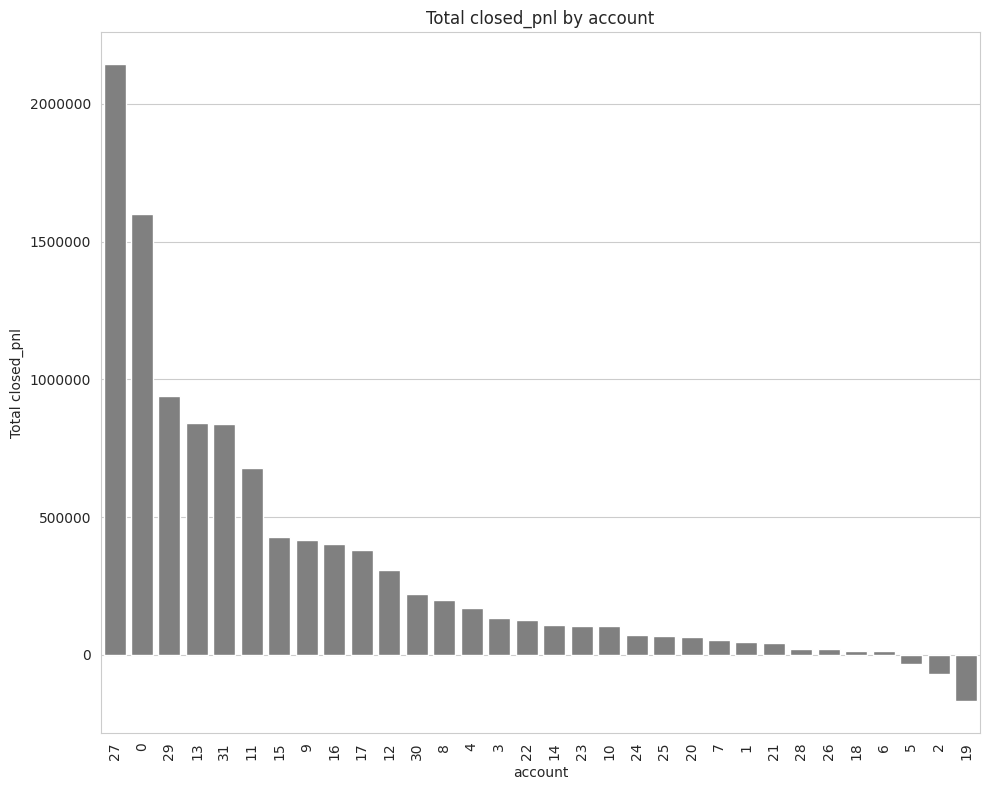

In [70]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_total.index, y=grouped_df_total['closed_pnl'], order=grouped_df_total.sort_values('closed_pnl', ascending=False).index, color='grey')
plt.title('Total closed_pnl by account')
plt.xlabel('account')
plt.ylabel('Total closed_pnl')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [23]:
grouped_df=df.groupby(by=['account', 'classification'])['closed_pnl'].sum()
grouped_df = grouped_df.unstack()
grouped_df = grouped_df.reset_index()

print(grouped_df.head())

classification                                     account   extreme_fear  \
0               0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441   
1               0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -4235.153051   
2               0x271b280974205ca63b716753467d5a371de622ab   16706.884912   
3               0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -25666.012284   
4               0x2c229d22b100a7beb69122eed721cee9b24011dd   11415.247787   

classification  extreme_greed          fear          greed        neutral  \
0               -40282.335904  1.113374e+06  276719.270187  125650.116740   
1                35658.894935 -1.658737e+03   30053.395556  -11933.080125   
2                 1793.160215  3.012191e+04 -100019.806374  -19038.340561   
3               108009.960644  1.342252e+04   31192.591971    5505.749364   
4                90895.050410  3.979191e+03   20075.672949   42292.843076   

classification  no_classification  
0                             NaN  
1 

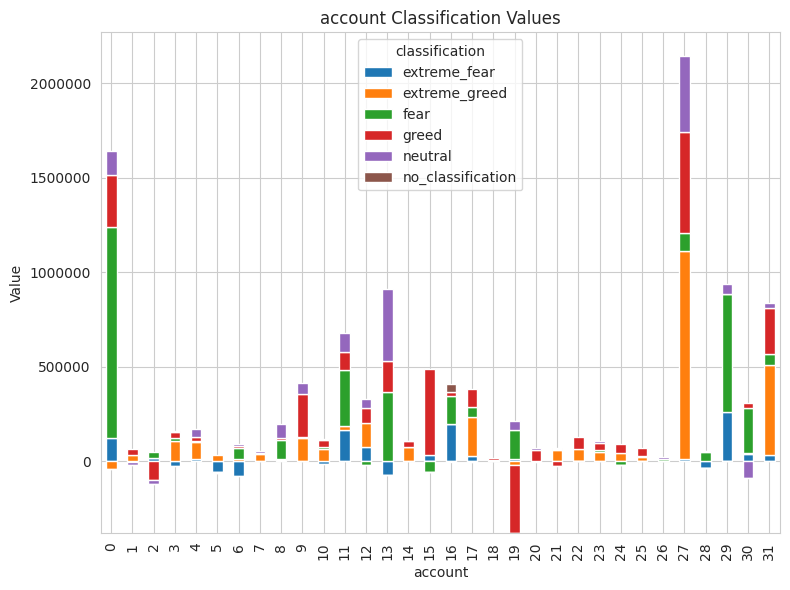

In [34]:
grouped_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('account Classification Values')
plt.ylabel('Value')
plt.xlabel('account')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [25]:
classifications=df['classification'].unique()
print(classifications)

['extreme_greed' 'extreme_fear' 'fear' 'greed' 'neutral'
 'no_classification']


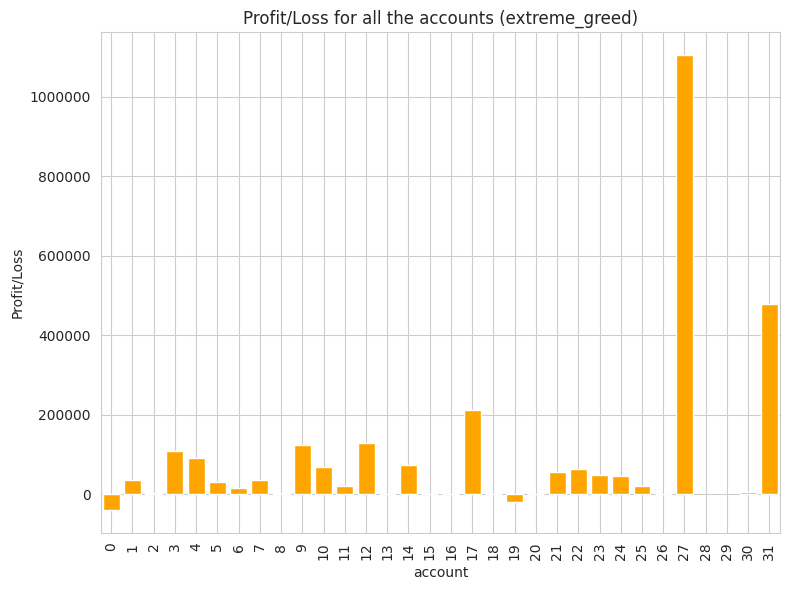

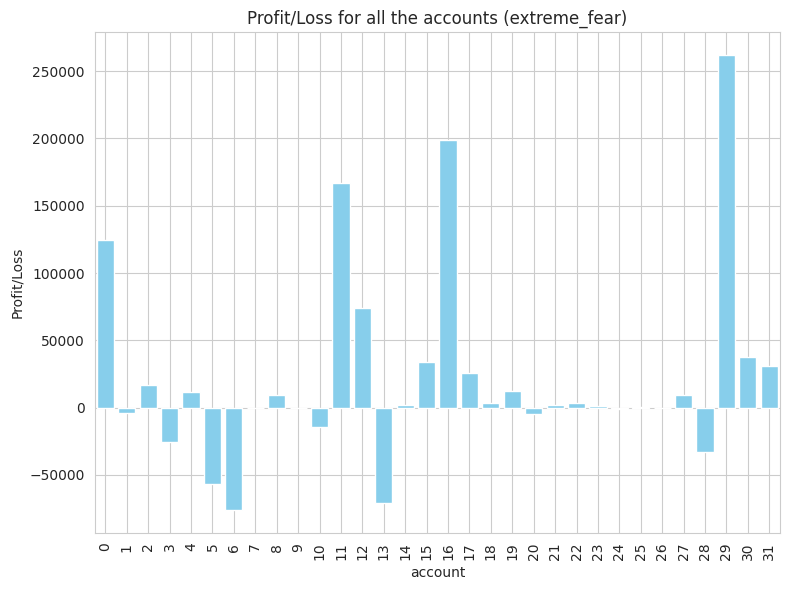

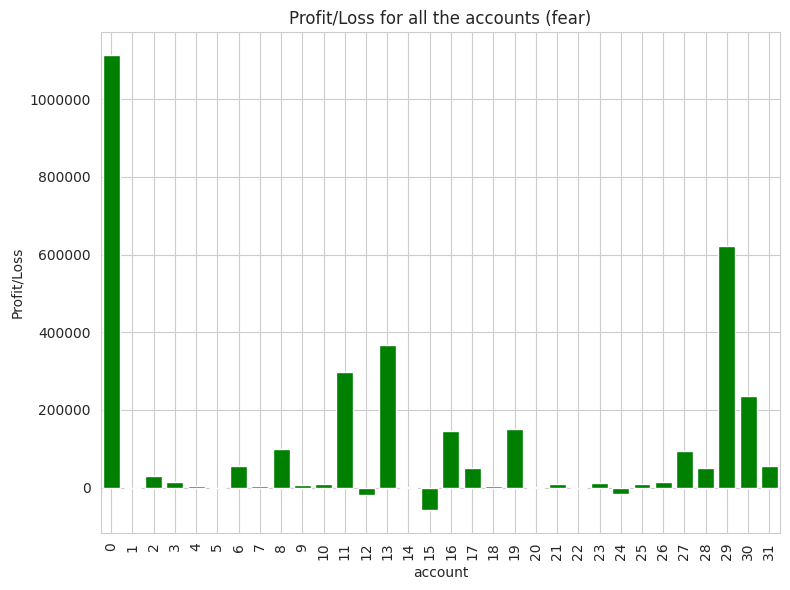

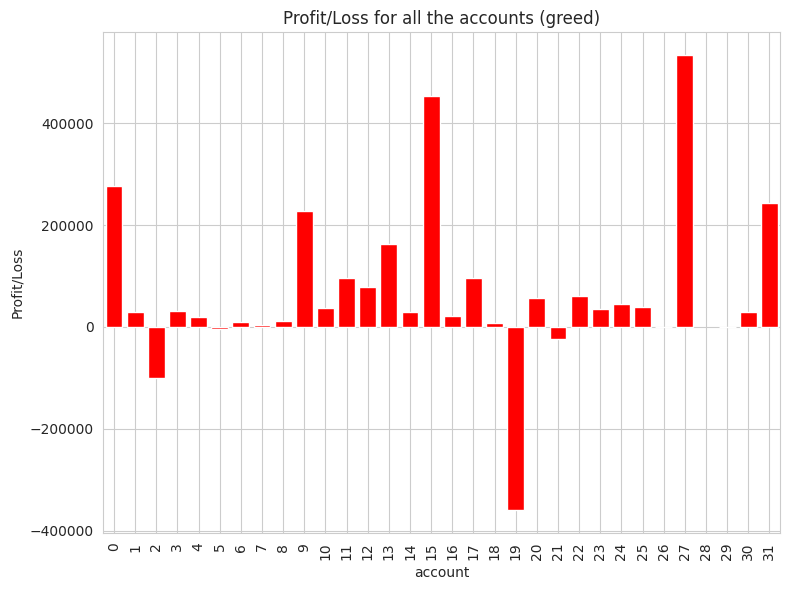

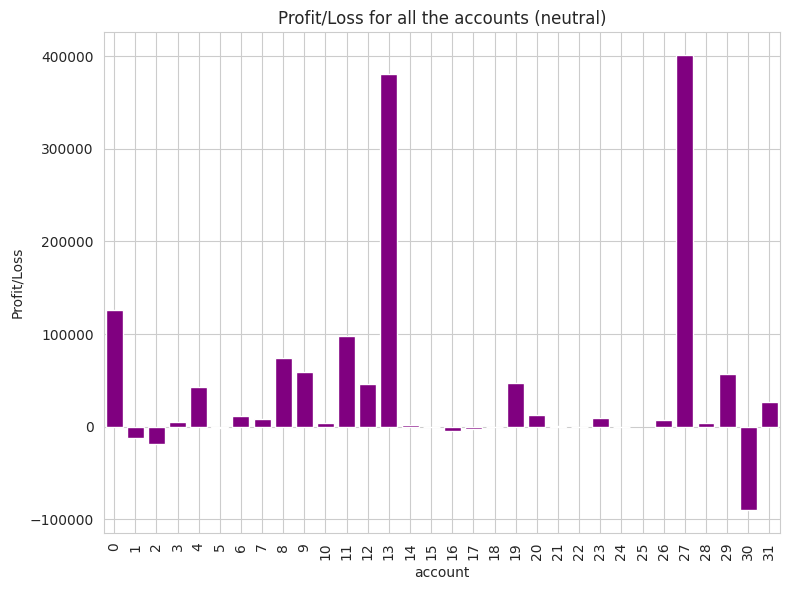

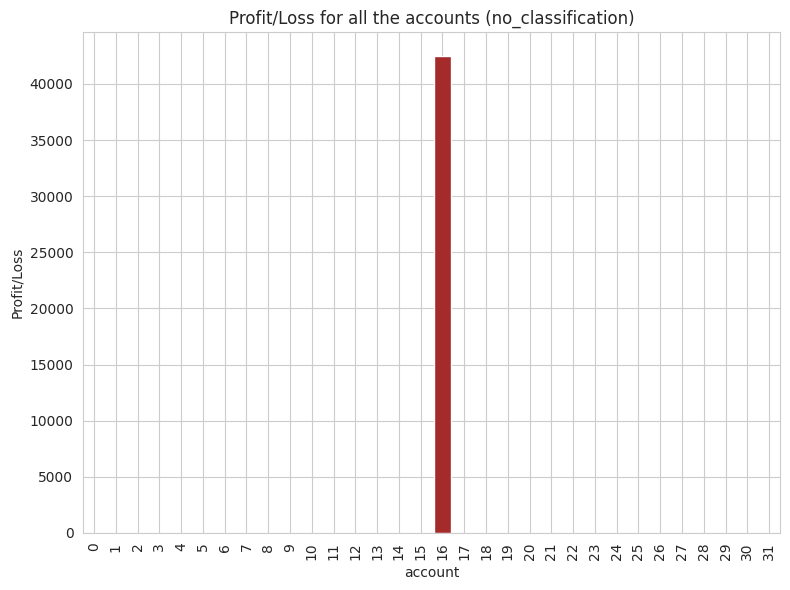

In [26]:
# colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']
colors = ['orange', 'skyblue', 'green', 'red', 'purple', 'brown']

for i, classification in enumerate(classifications):
    plt.figure(figsize=(8, 6))
    plt.bar(grouped_df.index, grouped_df[classification], color=colors[i % len(colors)]) # Use colors from the list
    plt.xlabel("account")
    plt.ylabel("Profit/Loss")
    plt.title(f"Profit/Loss for all the accounts ({classification})")
    plt.xticks(grouped_df.index, rotation=90)
    plt.xlim(-0.5, len(grouped_df_total.index) - 0.5)
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()

In [78]:
grouped_df_extremefear=grouped_df[['account', 'extreme_fear']]
grouped_df_extremegreed=grouped_df[['account', 'extreme_greed']]
grouped_df_fear=grouped_df[['account', 'fear']]
grouped_df_greed=grouped_df[['account', 'greed']]
grouped_df_neutral=grouped_df[['account', 'neutral']]
grouped_df_noclassification=grouped_df[['account', 'no_classification']]

grouped_df_extremefear.reset_index(drop=True)
grouped_df_extremegreed.reset_index(drop=True)
grouped_df_fear.reset_index(drop=True)
grouped_df_greed.reset_index(drop=True)
grouped_df_neutral.reset_index(drop=True)
grouped_df_noclassification.reset_index(drop=True)

grouped_df_extremefear.columns = ['account', 'value']
grouped_df_extremegreed.columns = ['account', 'value']
grouped_df_fear.columns = ['account', 'value']
grouped_df_greed.columns = ['account', 'value']
grouped_df_neutral.columns = ['account', 'value']
grouped_df_noclassification.columns = ['account', 'value']

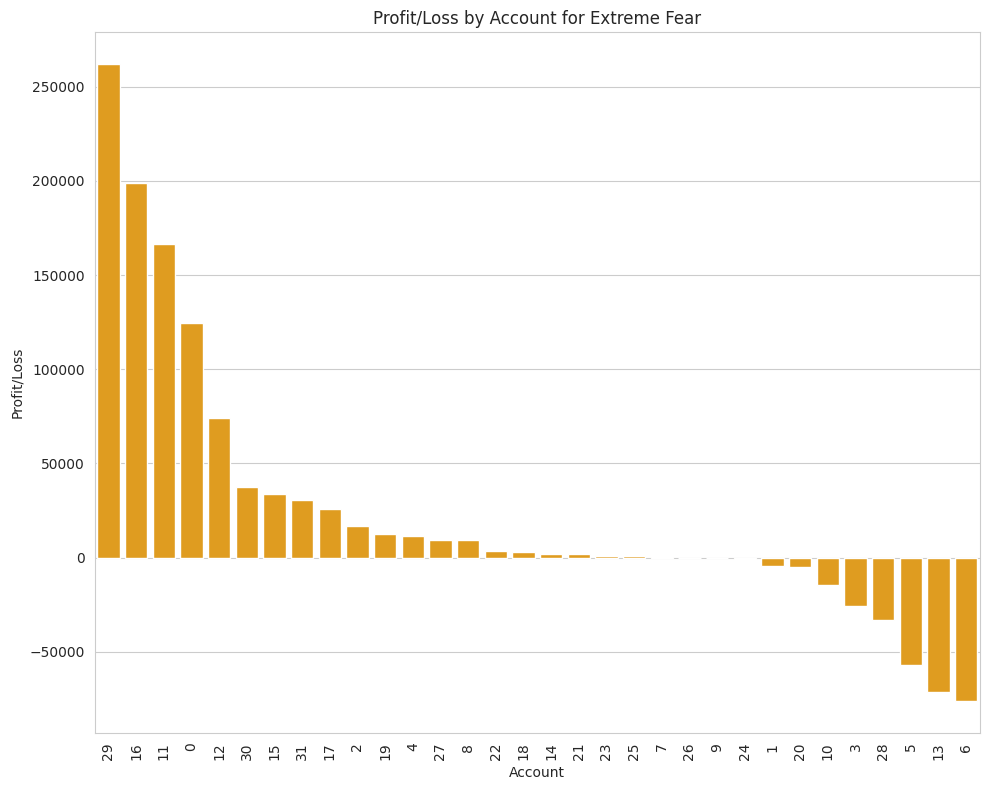

In [72]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_extremefear.index, y=grouped_df_extremefear['value'], order=grouped_df_extremefear.sort_values('value', ascending=False).index, color='orange')
plt.title('Profit/Loss by Account for Extreme Fear')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

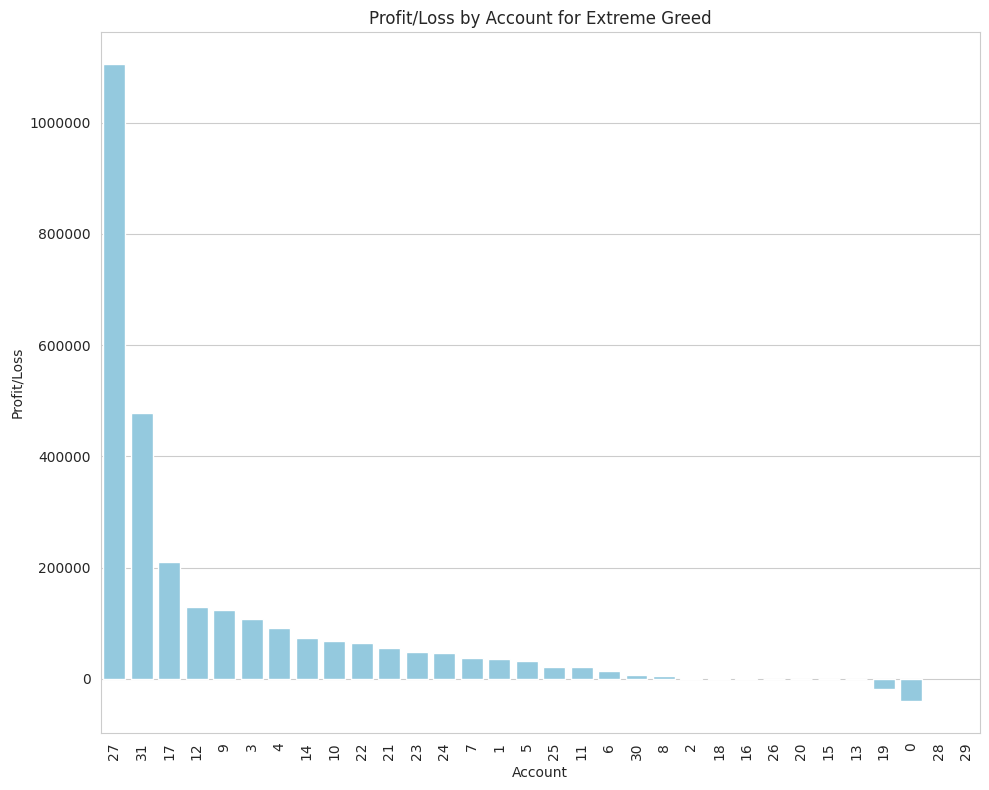

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_extremegreed.index, y=grouped_df_extremegreed['value'], order=grouped_df_extremegreed.sort_values('value', ascending=False).index, color='skyblue')
plt.title('Profit/Loss by Account for Extreme Greed')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

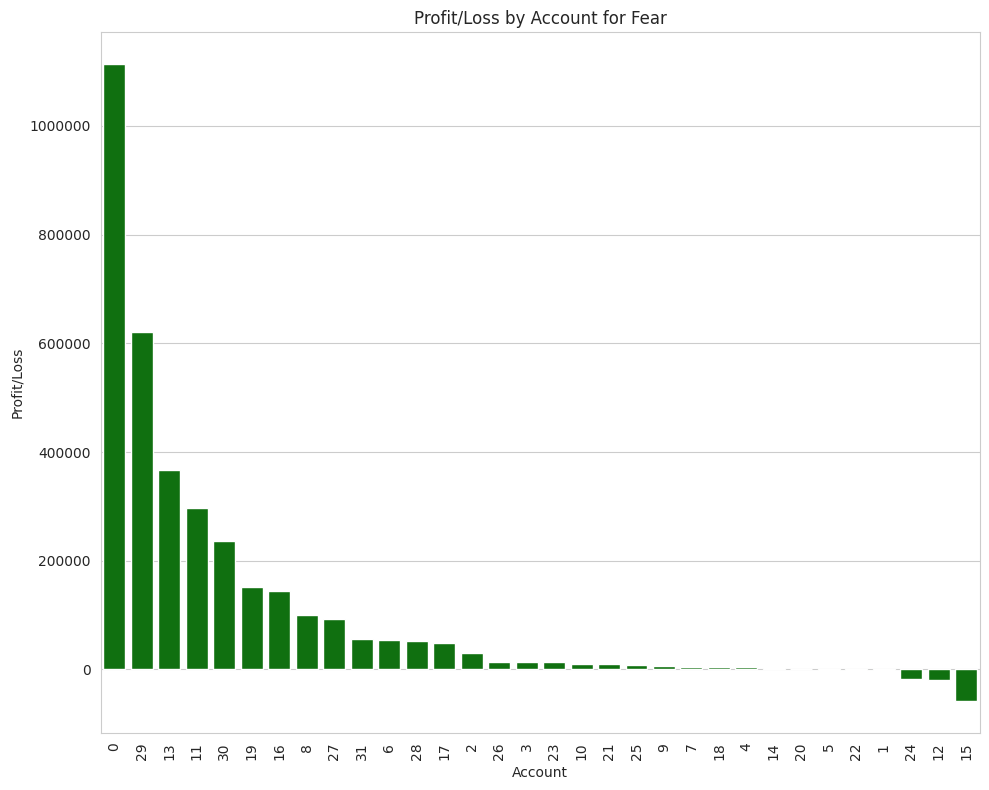

In [74]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_fear.index, y=grouped_df_fear['value'], order=grouped_df_fear.sort_values('value', ascending=False).index, color='green')
plt.title('Profit/Loss by Account for Fear')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

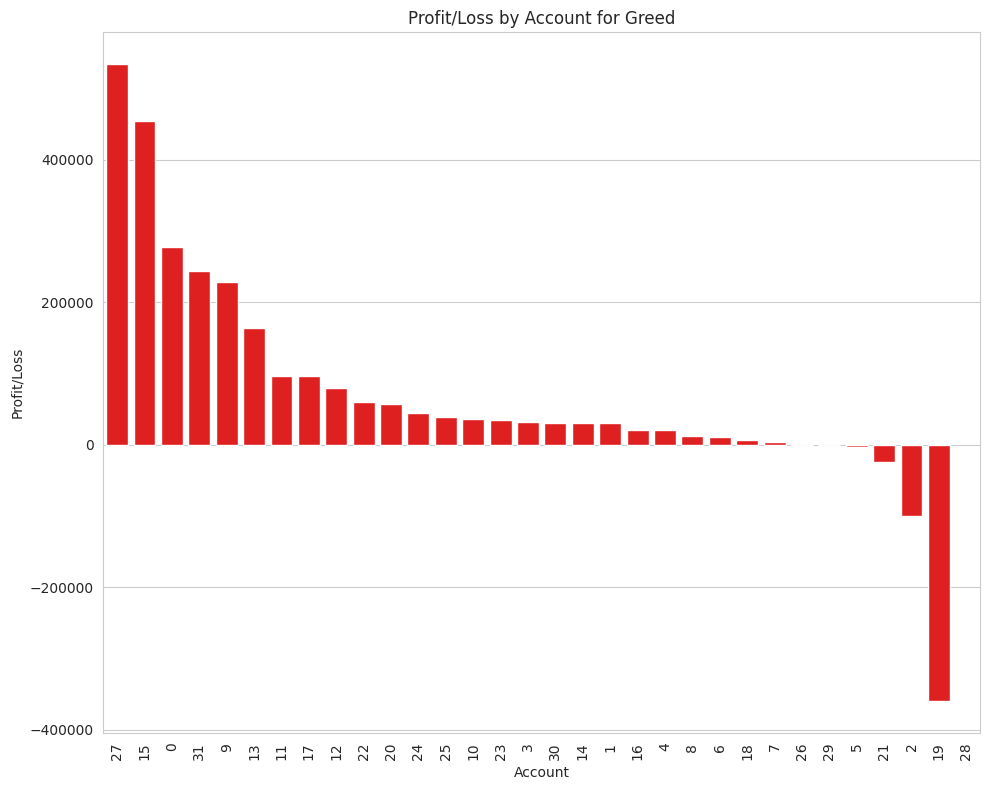

In [75]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_greed.index, y=grouped_df_greed['value'], order=grouped_df_greed.sort_values('value', ascending=False).index, color='red')
plt.title('Profit/Loss by Account for Greed')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

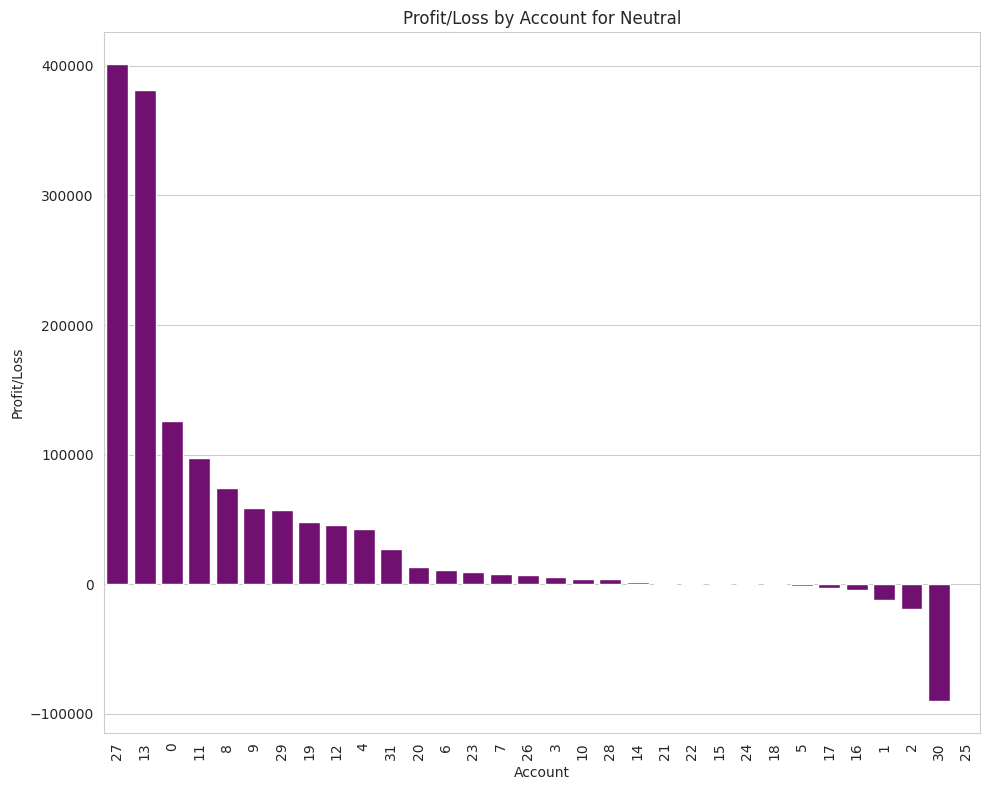

In [76]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_neutral.index, y=grouped_df_neutral['value'], order=grouped_df_neutral.sort_values('value', ascending=False).index, color='purple')
plt.title('Profit/Loss by Account for Neutral')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

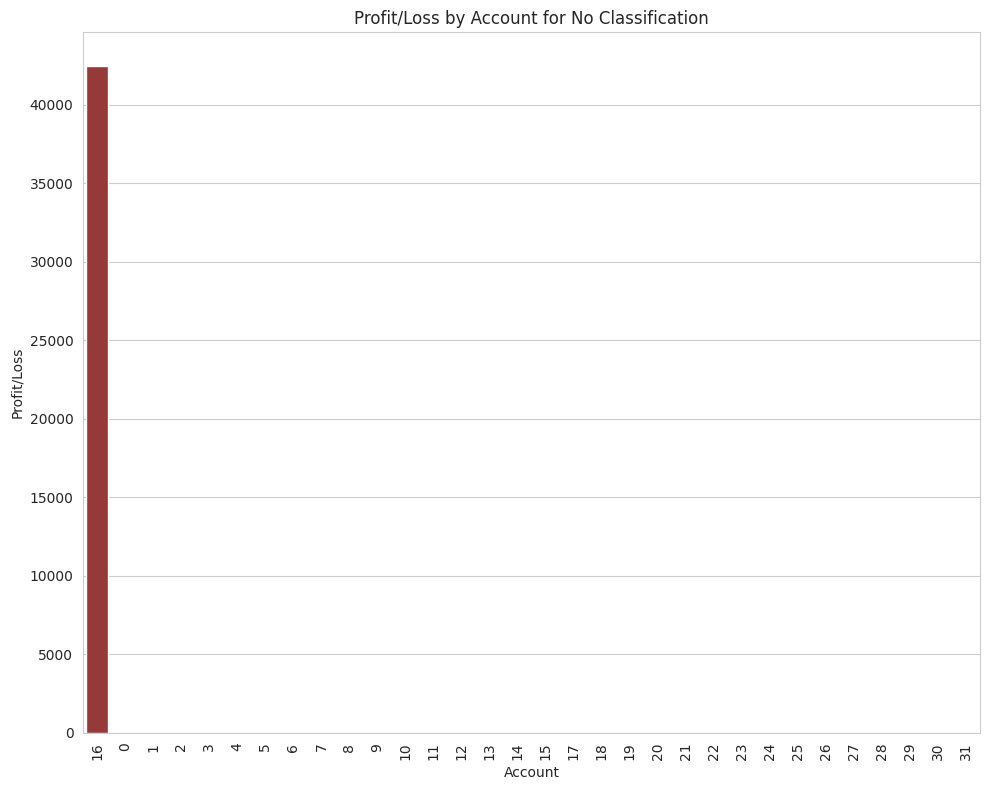

In [79]:
plt.figure(figsize=(10, 8))
sns.barplot(x=grouped_df_noclassification.index, y=grouped_df_noclassification['value'], order=grouped_df_noclassification.sort_values('value', ascending=False).index, color='brown')
plt.title('Profit/Loss by Account for No Classification')
plt.xlabel('Account')
plt.ylabel('Profit/Loss')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Insights

In [ ]:
# 'overall'
# Highest: 27, 0, 29
# Lowest: 19, 2, 5

# 'extreme_greed'
# Highest: 27, 31, 17
# Lowest: 0, 19

# 'extreme_fear'
# Highest: 29, 16, 11
# Lowest: 6, 13, 5

# 'fear'
# Highest: 0, 29, 13
# Lowest: 15, 12, 24

# 'greed'
# Highest: 27, 15, 0
# Lowest: 19, 2, 21

# 'neutral'
# Highest: 27, 13, 0
# Lowest: 30, 2, 1

# 'no_classification']
# Highest: 16
# Lowest:

In [ ]:
# 27 is the top performer across overall extreme greed greed and neutral showing strong bullish or aggressive sentiment
# 0 has strong presence across overall fear greed and neutral but is among the lowest in extreme greed indicating a more balanced or cautious aggressiveness
# 19 consistently underperforms across overall extreme greed and greed making it a notable underperformer
# 2 is low across overall greed and neutral indicating low engagement or weak signal
# 29 ranks high in overall extreme fear and fear showing strong sensitivity to fear driven signals